# We Rate Dogs

## Author: Ram Saran Vuppuluri

In this notebook we will analyze tweets in “WeRateDogs” twitter account. At the end of the note we will be able to answer:

1. Frequency distribution of dog rattings. 
2. Frequency distribution of dog breeds.
3. Relation between Retweets and Favorites.
4. Number of tweets per dog breed.

Note: Dog ratting, breed information is extracted by Udacity using tweet text and image information. We will be analyzing only tweets valid as of date. Any tweets that are deleted will not be included in the analysis.

Before analyzing any data, we need to perform following 3 steps:
1.	Gather data from one or more data sources.
2.	Assess data for any quality or tidiness issues.
3.	Clean data of the quality, tidiness issues identified during asses data step.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy
import os
import json
import time

## Gather Data

As per the problem statement we need to gather data from three data sources.
1.	__twitter-archive-enhanced.csv__ file provided by Udacity. This file is available for download directly. Once the file is downloaded it will be placed in the current working directory of the notebook.
2.	__image_predictions.tsv__ file provided by Udacity. This file is not directly available for download. Instead we need to utilize Python “requests” package.
3.	__tweet_json.txt__ file. This file is constructed by using tweet_id’s from twitter-archive-enhanced.csv file. We use “tweepy” library as API to retrieve data for each of tweet_id’s.

We will load each of these three data sources into Pandas dataframes.

In [2]:
twitter_arch_df = pd.read_csv('twitter-archive-enhanced.csv');

Below step will download __[image_prediction.tsv]( https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)__ and store as __image_predictions.tsv__ in current working direcoty.

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)
    
imgage_pred_df = pd.read_csv('image_predictions.tsv',sep='\t');

To connect to Twitter via Tweepy API, we need to perform following steps for a new Twitter user:
1.	Create a regular Twitter account.
2.	Once the regular Twitter account is created, create a developer account.
3.	Create an application on Twitter developer dashboard.
4.	New application will generate:
	* Consumer API key
    * Consumer API secret key
    * Access token key
    * Access token secret key


Once app authentication keys are available we can connect to Twitter via Tweepy API.


In [4]:
CONSUMER_API_KEY = 'XX'
CONSUMER_API_SECRET_KEY = 'XX'

ACCESS_TOKEN_KEY = 'XX'
ACCESS_TOKEN_SECRET_KEY = 'XX'

auth = tweepy.OAuthHandler(CONSUMER_API_KEY,CONSUMER_API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN_KEY,ACCESS_TOKEN_SECRET_KEY)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweet_file = 'tweet_json.txt'

Now that we are connected to Twitter via Tweepy, we can download all the tweets using tweet_id information from __twitter-archive-enhanced.csv__

In [5]:
'''error_id_list = []
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in twitter_arch_df.tweet_id:
        start = time.time()
        print(tweet_id);
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_json_line = json.dumps(tweet._json)
            file.write(tweet_json_line + '\n')
            end = time.time()
            print(end - start);
        except Exception:
            error_id_list.append(tweet_id)'''

"error_id_list = []\nwith open('tweet_json.txt', mode='w') as file:\n    for tweet_id in twitter_arch_df.tweet_id:\n        start = time.time()\n        print(tweet_id);\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode='extended')\n            tweet_json_line = json.dumps(tweet._json)\n            file.write(tweet_json_line + '\n')\n            end = time.time()\n            print(end - start);\n        except Exception:\n            error_id_list.append(tweet_id)"

In [6]:
'''len(error_id_list),len(twitter_arch_df.tweet_id),(len(twitter_arch_df.tweet_id)-len(error_id_list))'''

'len(error_id_list),len(twitter_arch_df.tweet_id),(len(twitter_arch_df.tweet_id)-len(error_id_list))'

In [7]:
tweet_json_df = pd.read_json('tweet_json.txt',lines=True);

In [8]:
tweet_json_df.rename(index=str,columns={'id':'tweet_id'},inplace=True)

As we have gathered all three data sources we will consolidated into one. 

In [9]:
tweet_cons_df = twitter_arch_df.merge(imgage_pred_df,on='tweet_id').merge(tweet_json_df,on='tweet_id')

In [10]:
len(twitter_arch_df),len(imgage_pred_df),len(tweet_json_df),len(tweet_cons_df)

(2356, 2075, 1395, 1213)

We will write consolicated dataframe into CSV file to help us out during assessment phase as Pandas Dataframe display will not show complete data in column, we can achive this with tools like Excel.

In [11]:
tweet_cons_df.to_csv("tweet_consolicated.csv",index=False)

## Assess Data

Now that we have gathered and loaded data into Pandas dataframes, we will perform visual and programmatic assessment.

On visual assessment 

1. Following columns are loaded as int64 instead of String (object).
    * tweet_id
    * id_str
2. Following columns are loaded as float instead of String (object).    
    * in_reply_to_status_id_x
    * in_reply_to_user_id_x
    * retweeted_status_id
    * retweeted_status_user_id
    * in_reply_to_status_id_y
    * in_reply_to_status_id_str
    * in_reply_to_user_id_y
    * in_reply_to_user_id_str
    * quoted_status_id
    * quoted_status_id_str
3. There are missing values in following columns:
    * in_reply_to_status_id_x
    * in_reply_to_user_id_x
    * retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp
    * expanded_urls
    * contributors
    * coordinates
    * geo
    * in_reply_to_screen_name
    * in_reply_to_status_id_y
    * in_reply_to_status_id_str
    * in_reply_to_user_id_y
    * in_reply_to_user_id_str
    * place
    * quoted_status
    * quoted_status_id
    * quoted_status_id_str
    * quoted_status_permalink
    * retweeted_status
4. Following columns are loaded as String (object) instead of timestamp instance.
    * timestamp
    * retweeted_status_timestamp
5. "lang" column is loaded as String (object) instead of catergory.
6. "expanded_urls" column contains more than 1 URL. (This obeservation is made by examining the values in Excel).
7. Following columns are common in between twitter_arch_df and tweet_json_df, we can remove duplicate columns and rename the columns existing columns.
    * in_reply_to_status_id
    * in_reply_to_user_id
    * source

In [12]:
tweet_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 59 columns):
tweet_id                         1213 non-null int64
in_reply_to_status_id_x          18 non-null float64
in_reply_to_user_id_x            18 non-null float64
timestamp                        1213 non-null object
source_x                         1213 non-null object
text                             1213 non-null object
retweeted_status_id              27 non-null float64
retweeted_status_user_id         27 non-null float64
retweeted_status_timestamp       27 non-null object
expanded_urls                    1213 non-null object
rating_numerator                 1213 non-null int64
rating_denominator               1213 non-null int64
name                             1213 non-null object
doggo                            1213 non-null object
floofer                          1213 non-null object
pupper                           1213 non-null object
puppo                            1213 

Pandas Dataframe describe() will provide basic statistical analysis of numerical data in dataframe.

On Programmatically assessment 
1. source_x, source_y has only 3 unique values each. We can ignore this column.
2. Dog names identified in p1,p2 and p3 columns contain special characters "-","_".
3. There is huge variation between 75th percentile of rating_numerator and maximum value.
4. rating_denominator contains values other than 10.

In [13]:
tweet_cons_df.source_x.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [14]:
tweet_cons_df.source_y.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [15]:
tweet_cons_df[tweet_cons_df.p1_dog == True].p1.unique()

array(['Chihuahua', 'basset', 'Chesapeake_Bay_retriever', 'Appenzeller',
       'Pomeranian', 'Irish_terrier', 'Pembroke', 'Samoyed',
       'French_bulldog', 'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'Labrador_retriever', 'malamute', 'Italian_greyhound', 'chow',
       'German_shepherd', 'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'Irish_setter', 'bloodhound',
       'Bernese_mountain_dog', 'West_Highland_white_terrier',
       'cocker_spaniel', 'flat-coated_retriever', 'Cardigan',
       'Newfoundland', 'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bedlington_terrier', 'Boston_bull',
       'Old_English_sheepdog', 'black-and-tan_coonhound', 'Great_Dane',
 

In [16]:
tweet_cons_df[tweet_cons_df.p2_dog == True].p2.unique()

array(['Pekinese', 'malamute', 'Labrador_retriever', 'English_springer',
       'Irish_terrier', 'Border_collie', 'Eskimo_dog', 'Irish_setter',
       'Cardigan', 'Pomeranian', 'boxer', 'borzoi', 'Tibetan_mastiff',
       'pug', 'redbone', 'Rhodesian_ridgeback', 'toy_terrier',
       'Great_Pyrenees', 'Chihuahua', 'Shih-Tzu', 'Siberian_husky',
       'American_Staffordshire_terrier', 'Norwich_terrier',
       'French_bulldog', 'malinois', 'miniature_pinscher',
       'Chesapeake_Bay_retriever', 'Afghan_hound', 'beagle', 'vizsla',
       'Boston_bull', 'whippet', 'collie', 'golden_retriever',
       'Welsh_springer_spaniel', 'Italian_greyhound', 'Saint_Bernard',
       'Pembroke', 'Staffordshire_bullterrier', 'miniature_poodle',
       'black-and-tan_coonhound', 'bloodhound', 'Sussex_spaniel',
       'flat-coated_retriever', 'briard', 'Appenzeller', 'kuvasz',
       'papillon', 'groenendael', 'Airedale', 'toy_poodle',
       'Tibetan_terrier', 'Doberman', 'otterhound', 'Brabancon_griffo

In [17]:
tweet_cons_df[tweet_cons_df.p3_dog == True].p3.unique()

array(['papillon', 'kelpie', 'German_short-haired_pointer', 'Pembroke',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'chow', 'basenji',
       'Staffordshire_bullterrier', 'redbone', 'Saluki',
       'Labrador_retriever', 'English_setter', 'malamute', 'bull_mastiff',
       'Weimaraner', 'beagle', 'Dandie_Dinmont', 'Boston_bull',
       'Bernese_mountain_dog', 'kuvasz', 'pug', 'Eskimo_dog',
       'Norfolk_terrier', 'Brabancon_griffon', 'Norwegian_elkhound',
       'Newfoundland', 'flat-coated_retriever', 'Cardigan',
       'cocker_spaniel', 'golden_retriever', 'clumber',
       'American_Staffordshire_terrier', 'Ibizan_hound', 'Appenzeller',
       'toy_terrier', 'Irish_terrier', 'Tibetan_mastiff',
       'Greater_Swiss_Mountain_dog', 'vizsla', 'Great_Pyrenees',
       'toy_poodle', 'standard_poodle', 'dalmatian', 'Pomeranian',
       'bloodhound', 'EntleBucher', 'Saint_Bernard', 'collie', 'Pekinese',
       'curly-coated_retriever', 'keeshond', 'Siberian_husky', 'boxer',
       'G

In [18]:
tweet_cons_df.describe()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,...,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,1.213000e+03,1.800000e+01,1.800000e+01,2.700000e+01,2.700000e+01,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,0.0,1213.0,1213.0,0.0,0.0,1213.000000
mean,7.472665e+17,6.966043e+17,4.196984e+09,8.129953e+17,2.916525e+16,11.729596,10.768343,1.225062,0.599390,0.131991,...,6.966043e+17,6.966043e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,3121.655400
std,7.404675e+16,4.633543e+16,0.000000e+00,3.795099e+16,1.515471e+17,9.916454,8.471750,0.581308,0.270416,0.098885,...,4.633543e+16,4.633543e+16,0.000000e+00,0.000000e+00,NaN,0.0,0.0,NaN,NaN,4921.190923
min,6.737115e+17,6.671522e+17,4.196984e+09,7.119983e+17,7.832140e+05,0.000000,10.000000,1.000000,0.059033,0.000046,...,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,23.000000
25%,6.853152e+17,6.747625e+17,4.196984e+09,7.921163e+17,7.044025e+08,10.000000,10.000000,1.000000,0.364729,0.052724,...,6.747625e+17,6.747625e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,791.000000
50%,7.095662e+17,6.756022e+17,4.196984e+09,8.190064e+17,4.196984e+09,11.000000,10.000000,1.000000,0.606654,0.117402,...,6.756022e+17,6.756022e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,1432.000000
75%,8.268488e+17,7.002919e+17,4.196984e+09,8.358362e+17,4.196984e+09,12.000000,10.000000,1.000000,0.853170,0.190569,...,7.002919e+17,7.002919e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,3536.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,204.000000,170.000000,4.000000,0.999885,0.488014,...,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,NaN,0.0,0.0,NaN,NaN,62665.000000


In [19]:
tweet_cons_df.rating_numerator.value_counts().sort_index()

0        1
1        1
2        3
3       11
4        7
5       17
6       14
7       22
8       39
9       91
10     230
11     229
12     290
13     212
14      32
15       1
26       1
44       1
45       1
50       1
60       1
80       1
84       1
88       1
99       1
121      1
143      1
144      1
204      1
Name: rating_numerator, dtype: int64

In [20]:
tweet_cons_df.rating_denominator.value_counts().sort_index()

10     1198
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
170       1
Name: rating_denominator, dtype: int64

From above visual and programmatic analysis, we find quality and tidiness issues:

#### Quality issues:

1. Following columns are loaded as int64 instead of String (object).
    * tweet_id
    * id_str
2. Following columns are loaded as float instead of String (object), we can remove these columns as they are not utilized in analysis.    
    * in_reply_to_status_id_x
    * in_reply_to_user_id_x
    * retweeted_status_id
    * retweeted_status_user_id
    * in_reply_to_status_id_y
    * in_reply_to_status_id_str
    * in_reply_to_user_id_y
    * in_reply_to_user_id_str
    * quoted_status_id
    * quoted_status_id_str
3. There are missing values in following columns, we can remove these columns as they are not utilized in analysis.
    * retweeted_status_timestamp
    * expanded_urls
    * contributors
    * coordinates
    * geo
    * in_reply_to_screen_name
    * place
    * quoted_status
    * quoted_status_permalink
    * retweeted_status
4. Following columns are loaded as String (object) instead of datetime64 instance.
    * timestamp
5. "lang" column is loaded as String (object) instead of catergory.
6. "expanded_urls" column contains more than 1 URL. (This obeservation is made by examining the values in Excel). We can remove this column as it is not utilized in analysis.
7. rating_numerator should be in range 10 to 14, but there are values out of range. We can remove out of range values.
8. rating_denominator should be 10, there are values not equal to 10. We can remove non 10 values.

#### Tidiness issues:

1. Following columns are common in between twitter_arch_df and tweet_json_df, we can remove duplicate columns and rename the columns existing columns.
    * in_reply_to_status_id
    * in_reply_to_user_id
    * source
2. Following columns are not needed for analysis.
    * timestamp
    * source_x
    * text
    * name                           
    * jpg_url
    * img_num
    * created_at
    * display_text_range
    * entities
    * extended_entities                   
    * favorited
    * full_text
    * id_str
    * is_quote_status
    * lang
    * possibly_sensitive
    * possibly_sensitive_appealable    
    * retweeted
    * source_y
    * truncated
    * user
3. Not all records identified in image-prediction file not always dogs. We can remove non dog records.
4. Image prediction data has 3 possible predictions for each of the tweets along with whether the prediction has classified as dog or not and confidence of the predictions. We will 
    1. use only predictions that are of dogs.
    2. select maximum prediction value.
    3. use the dog breed from maximum prediction value.
5. Dog breeds contain special characters "-","_". We will replace the special characters with " ".


## Clean Data

In [21]:
tweet_cons_clean_df = tweet_cons_df.copy()

### Quality changes

1. Following columns are loaded as int64 instead of String (object).
    * tweet_id
    * id_str
    
#### Code

In [22]:
tweet_cons_clean_df.tweet_id.dtype, tweet_cons_clean_df.id_str.dtype

(dtype('int64'), dtype('int64'))

In [23]:
tweet_cons_clean_df[['tweet_id','id_str']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 2 columns):
tweet_id    1213 non-null int64
id_str      1213 non-null int64
dtypes: int64(2)
memory usage: 28.4 KB


In [24]:
tweet_cons_clean_df.tweet_id = tweet_cons_clean_df.tweet_id.astype(str)
tweet_cons_clean_df.id_str = tweet_cons_clean_df.id_str.astype(str)

#### Test

In [25]:
tweet_cons_clean_df.tweet_id.dtype, tweet_cons_clean_df.id_str.dtype

(dtype('O'), dtype('O'))

In [26]:
tweet_cons_clean_df[['tweet_id','id_str']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 2 columns):
tweet_id    1213 non-null object
id_str      1213 non-null object
dtypes: object(2)
memory usage: 28.4+ KB


2. Following columns are loaded as float instead of String (object), we can remove these columns as they are not utilized in analysis.    
    * in_reply_to_status_id_x
    * in_reply_to_user_id_x
    * retweeted_status_id
    * retweeted_status_user_id
    * in_reply_to_status_id_y
    * in_reply_to_status_id_str
    * in_reply_to_user_id_y
    * in_reply_to_user_id_str
    * quoted_status_id
    * quoted_status_id_str
    
#### Code

In [27]:
tweet_cons_clean_df[['in_reply_to_status_id_x','in_reply_to_user_id_x','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','quoted_status_id','quoted_status_id_str'
]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 10 columns):
in_reply_to_status_id_x      18 non-null float64
in_reply_to_user_id_x        18 non-null float64
retweeted_status_id          27 non-null float64
retweeted_status_user_id     27 non-null float64
in_reply_to_status_id_y      18 non-null float64
in_reply_to_status_id_str    18 non-null float64
in_reply_to_user_id_y        18 non-null float64
in_reply_to_user_id_str      18 non-null float64
quoted_status_id             0 non-null float64
quoted_status_id_str         0 non-null float64
dtypes: float64(10)
memory usage: 104.2 KB


In [28]:
tweet_cons_clean_df.drop(['in_reply_to_status_id_x','in_reply_to_user_id_x','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','quoted_status_id','quoted_status_id_str'
],axis=1,inplace = True)

#### Test

In [29]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 49 columns):
tweet_id                         1213 non-null object
timestamp                        1213 non-null object
source_x                         1213 non-null object
text                             1213 non-null object
retweeted_status_timestamp       27 non-null object
expanded_urls                    1213 non-null object
rating_numerator                 1213 non-null int64
rating_denominator               1213 non-null int64
name                             1213 non-null object
doggo                            1213 non-null object
floofer                          1213 non-null object
pupper                           1213 non-null object
puppo                            1213 non-null object
jpg_url                          1213 non-null object
img_num                          1213 non-null int64
p1                               1213 non-null object
p1_conf                          1

3. There are missing values in following columns, we can remove these columns as they are not utilized in analysis.
    * in_reply_to_status_id_x
    * in_reply_to_user_id_x
    * retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp
    * expanded_urls
    * contributors
    * coordinates
    * geo
    * in_reply_to_screen_name
    * in_reply_to_status_id_y
    * in_reply_to_status_id_str
    * in_reply_to_user_id_y
    * in_reply_to_user_id_str
    * place
    * quoted_status
    * quoted_status_id
    * quoted_status_id_str
    * quoted_status_permalink
    * retweeted_status
    
#### Code

In [30]:
tweet_cons_clean_df.drop(['retweeted_status_timestamp','expanded_urls','contributors','coordinates','geo','in_reply_to_screen_name','place','quoted_status','quoted_status_permalink','retweeted_status'
],axis=1,inplace = True)

#### Test

In [31]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 39 columns):
tweet_id                         1213 non-null object
timestamp                        1213 non-null object
source_x                         1213 non-null object
text                             1213 non-null object
rating_numerator                 1213 non-null int64
rating_denominator               1213 non-null int64
name                             1213 non-null object
doggo                            1213 non-null object
floofer                          1213 non-null object
pupper                           1213 non-null object
puppo                            1213 non-null object
jpg_url                          1213 non-null object
img_num                          1213 non-null int64
p1                               1213 non-null object
p1_conf                          1213 non-null float64
p1_dog                           1213 non-null bool
p2                               

4. Following columns are loaded as String (object) instead of datetime64 instance.
    * timestamp
    
#### Code

In [32]:
tweet_cons_clean_df['timestamp'] = pd.to_datetime(tweet_cons_clean_df['timestamp'])

#### Test

In [33]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 39 columns):
tweet_id                         1213 non-null object
timestamp                        1213 non-null datetime64[ns]
source_x                         1213 non-null object
text                             1213 non-null object
rating_numerator                 1213 non-null int64
rating_denominator               1213 non-null int64
name                             1213 non-null object
doggo                            1213 non-null object
floofer                          1213 non-null object
pupper                           1213 non-null object
puppo                            1213 non-null object
jpg_url                          1213 non-null object
img_num                          1213 non-null int64
p1                               1213 non-null object
p1_conf                          1213 non-null float64
p1_dog                           1213 non-null bool
p2                       

5. "lang" column is loaded as String (object) instead of catergory.

#### Code

In [34]:
tweet_cons_clean_df.lang = tweet_cons_clean_df.lang.astype(dtype="category")

#### Test

In [35]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 39 columns):
tweet_id                         1213 non-null object
timestamp                        1213 non-null datetime64[ns]
source_x                         1213 non-null object
text                             1213 non-null object
rating_numerator                 1213 non-null int64
rating_denominator               1213 non-null int64
name                             1213 non-null object
doggo                            1213 non-null object
floofer                          1213 non-null object
pupper                           1213 non-null object
puppo                            1213 non-null object
jpg_url                          1213 non-null object
img_num                          1213 non-null int64
p1                               1213 non-null object
p1_conf                          1213 non-null float64
p1_dog                           1213 non-null bool
p2                       

6. "expanded_urls" column contains more than 1 URL. (This obeservation is made by examining the values in Excel). We can remove this column as it is not utilized in analysis. Perfromed as part of 3.

7. rating_numerator should be in range 10 to 14, but there are values out of range. We can remove out of range values.

#### Code

In [36]:
tweet_cons_clean_df = tweet_cons_clean_df[(tweet_cons_clean_df.rating_numerator >= 10) & (tweet_cons_clean_df.rating_numerator <=14)]

#### Test

Below code snippet will yield 0 as we removed any of the records with rating_numerator < 10 or rating_numerator > 14

In [37]:
len(tweet_cons_clean_df[(tweet_cons_clean_df.rating_numerator < 10) | (tweet_cons_clean_df.rating_numerator > 14)])

0

8. rating_denominator should be 10, there are values not equal to 10. We can remove non 10 values.

#### Code

In [38]:
tweet_cons_clean_df = tweet_cons_clean_df[tweet_cons_clean_df.rating_denominator == 10]

#### Test

Below code snippet will yield 0 as we removed any of the records with rating_denominator != 10.

In [39]:
len(tweet_cons_clean_df[tweet_cons_clean_df.rating_denominator != 10])

0

### Tidiness issues:

1. Following columns are common in between twitter_arch_df and tweet_json_df, we can remove duplicate columns and rename the columns existing columns.
    * in_reply_to_status_id
    * in_reply_to_user_id
    * source

#### Code

In [40]:
tweet_cons_clean_df.drop(['source_x','source_y'],axis=1,inplace=True)

#### Test

In [41]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 1212
Data columns (total 37 columns):
tweet_id                         993 non-null object
timestamp                        993 non-null datetime64[ns]
text                             993 non-null object
rating_numerator                 993 non-null int64
rating_denominator               993 non-null int64
name                             993 non-null object
doggo                            993 non-null object
floofer                          993 non-null object
pupper                           993 non-null object
puppo                            993 non-null object
jpg_url                          993 non-null object
img_num                          993 non-null int64
p1                               993 non-null object
p1_conf                          993 non-null float64
p1_dog                           993 non-null bool
p2                               993 non-null object
p2_conf                          993 non-n

2. Following columns are not needed for analysis.
    * timestamp
    * source_x
    * text
    * name                           
    * jpg_url
    * img_num
    * created_at
    * display_text_range
    * entities
    * extended_entities                   
    * favorited
    * full_text
    * id_str
    * is_quote_status
    * lang
    * possibly_sensitive
    * possibly_sensitive_appealable    
    * retweeted
    * source_y
    * truncated
    * user

#### Code

In [42]:
tweet_cons_clean_df.drop(['timestamp','text','name','jpg_url','img_num','created_at','display_text_range','entities','extended_entities','favorited','full_text','id_str','is_quote_status','lang','possibly_sensitive','possibly_sensitive_appealable','retweeted','truncated','user'],axis=1,inplace=True)

#### Test

In [43]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 1212
Data columns (total 18 columns):
tweet_id              993 non-null object
rating_numerator      993 non-null int64
rating_denominator    993 non-null int64
doggo                 993 non-null object
floofer               993 non-null object
pupper                993 non-null object
puppo                 993 non-null object
p1                    993 non-null object
p1_conf               993 non-null float64
p1_dog                993 non-null bool
p2                    993 non-null object
p2_conf               993 non-null float64
p2_dog                993 non-null bool
p3                    993 non-null object
p3_conf               993 non-null float64
p3_dog                993 non-null bool
favorite_count        993 non-null int64
retweet_count         993 non-null int64
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 127.0+ KB


3. Not all records identified in image-prediction file not always dogs. We can remove non dog records.

#### Code

In [44]:
tweet_cons_clean_df = tweet_cons_clean_df[(tweet_cons_clean_df.p1_dog == True)|(tweet_cons_clean_df.p2_dog==True)|(tweet_cons_clean_df.p3_dog==True)]

#### Test

Below code snippet will yield 0 records as atlest one of the preditions should yield True for dog.

In [45]:
len(tweet_cons_clean_df[(tweet_cons_clean_df.p1_dog == False)&(tweet_cons_clean_df.p2_dog==False)&(tweet_cons_clean_df.p3_dog==False)])

0

4. Image prediction data has 3 possible predictions for each of the tweets along with whether the prediction has classified as dog or not and confidence of the predictions. We will 
    1. use only predictions that are of dogs.
    2. select maximum prediction value.
    3. use the dog breed from maximum prediction value.

#### Code

In [46]:
tweet_cons_clean_df.loc[tweet_cons_clean_df.p1_dog == False,'p1_conf'] = 0

In [47]:
tweet_cons_clean_df.loc[tweet_cons_clean_df.p2_dog == False,'p2_conf'] = 0

In [48]:
tweet_cons_clean_df.loc[tweet_cons_clean_df.p3_dog == False,'p3_conf'] = 0

In [49]:
tweet_cons_clean_df.head()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1,892177421306343426,13,10,None,None,None,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32867,6207
2,891815181378084864,12,10,None,None,None,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24758,4107
3,891689557279858688,13,10,None,None,None,None,paper_towel,0.000000,False,Labrador_retriever,0.168086,True,spatula,0.000000,False,41696,8546
4,891327558926688256,12,10,None,None,None,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39869,9276
5,891087950875897856,13,10,None,None,None,None,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.000000,False,20020,3077


In [50]:
tweet_cons_clean_df['max_conf'] = tweet_cons_clean_df[['p1_conf','p2_conf','p3_conf']].max(axis=1)

In [51]:
tweet_cons_clean_df['dog_1'] = tweet_cons_clean_df[(tweet_cons_clean_df.p1_conf==tweet_cons_clean_df.max_conf)].p1

tweet_cons_clean_df['dog_2'] = tweet_cons_clean_df[(tweet_cons_clean_df.p2_conf==tweet_cons_clean_df.max_conf)].p2

tweet_cons_clean_df['dog_3'] = tweet_cons_clean_df[(tweet_cons_clean_df.p3_conf==tweet_cons_clean_df.max_conf)].p3

In [52]:
tweet_cons_clean_df['dog_1']=tweet_cons_clean_df['dog_1'].fillna('')

tweet_cons_clean_df['dog_2']=tweet_cons_clean_df['dog_2'].fillna('')

tweet_cons_clean_df['dog_3']=tweet_cons_clean_df['dog_3'].fillna('')

In [53]:
tweet_cons_clean_df['p_dog_breed']= tweet_cons_clean_df['dog_1']+tweet_cons_clean_df['dog_2']+tweet_cons_clean_df['dog_3']

#### Test

In [54]:
tweet_cons_clean_df.head()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,max_conf,dog_1,dog_2,dog_3,p_dog_breed
1,892177421306343426,13,10,None,None,None,None,Chihuahua,0.323581,True,...,papillon,0.068957,True,32867,6207,0.323581,Chihuahua,,,Chihuahua
2,891815181378084864,12,10,None,None,None,None,Chihuahua,0.716012,True,...,kelpie,0.031379,True,24758,4107,0.716012,Chihuahua,,,Chihuahua
3,891689557279858688,13,10,None,None,None,None,paper_towel,0.000000,False,...,spatula,0.000000,False,41696,8546,0.168086,,Labrador_retriever,,Labrador_retriever
4,891327558926688256,12,10,None,None,None,None,basset,0.555712,True,...,German_short-haired_pointer,0.175219,True,39869,9276,0.555712,basset,,,basset
5,891087950875897856,13,10,None,None,None,None,Chesapeake_Bay_retriever,0.425595,True,...,Indian_elephant,0.000000,False,20020,3077,0.425595,Chesapeake_Bay_retriever,,,Chesapeake_Bay_retriever


In [55]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 1212
Data columns (total 23 columns):
tweet_id              888 non-null object
rating_numerator      888 non-null int64
rating_denominator    888 non-null int64
doggo                 888 non-null object
floofer               888 non-null object
pupper                888 non-null object
puppo                 888 non-null object
p1                    888 non-null object
p1_conf               888 non-null float64
p1_dog                888 non-null bool
p2                    888 non-null object
p2_conf               888 non-null float64
p2_dog                888 non-null bool
p3                    888 non-null object
p3_conf               888 non-null float64
p3_dog                888 non-null bool
favorite_count        888 non-null int64
retweet_count         888 non-null int64
max_conf              888 non-null float64
dog_1                 888 non-null object
dog_2                 888 non-null object
dog_3             

Now that we extracted predicted dog breed, we will delete following columns 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','max_conf','dog_1','dog_2','dog_3'

In [56]:
tweet_cons_clean_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','max_conf','dog_1','dog_2','dog_3'],axis=1,inplace=True)

In [57]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 1212
Data columns (total 10 columns):
tweet_id              888 non-null object
rating_numerator      888 non-null int64
rating_denominator    888 non-null int64
doggo                 888 non-null object
floofer               888 non-null object
pupper                888 non-null object
puppo                 888 non-null object
favorite_count        888 non-null int64
retweet_count         888 non-null int64
p_dog_breed           888 non-null object
dtypes: int64(4), object(6)
memory usage: 76.3+ KB


5. Dog breeds contain special characters "-","_". We will replace the special characters with " ".

#### Code

In [58]:
len(tweet_cons_clean_df[tweet_cons_clean_df.p_dog_breed.str.contains("_")]),len(tweet_cons_clean_df[tweet_cons_clean_df.p_dog_breed.str.contains("-")])

(484, 28)

In [59]:
tweet_cons_clean_df['p_dog_breed']=tweet_cons_clean_df.p_dog_breed.str.replace('_',' ')
tweet_cons_clean_df['p_dog_breed']=tweet_cons_clean_df.p_dog_breed.str.replace('-',' ')
tweet_cons_clean_df['p_dog_breed']=tweet_cons_clean_df.p_dog_breed.str.title()

#### Test

In [60]:
len(tweet_cons_clean_df[tweet_cons_clean_df.p_dog_breed.str.contains("_")]),len(tweet_cons_clean_df[tweet_cons_clean_df.p_dog_breed.str.contains("-")])

(0, 0)

In [61]:
tweet_cons_clean_df.loc[tweet_cons_clean_df.doggo=='None','doggo'] =''
tweet_cons_clean_df.loc[tweet_cons_clean_df.floofer=='None','floofer'] =''
tweet_cons_clean_df.loc[tweet_cons_clean_df.pupper=='None','pupper'] =''
tweet_cons_clean_df.loc[tweet_cons_clean_df.puppo=='None','puppo'] =''

In [62]:
len(tweet_cons_clean_df[tweet_cons_clean_df.doggo=='None']),len(tweet_cons_clean_df[tweet_cons_clean_df.floofer=='None']),len(tweet_cons_clean_df[tweet_cons_clean_df.pupper=='None']),len(tweet_cons_clean_df[tweet_cons_clean_df.puppo=='None'])

(0, 0, 0, 0)

In [63]:
tweet_cons_clean_df['dog_type']= tweet_cons_clean_df['doggo']+tweet_cons_clean_df['floofer']+tweet_cons_clean_df['pupper']+tweet_cons_clean_df['puppo']

In [64]:
tweet_cons_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 1212
Data columns (total 11 columns):
tweet_id              888 non-null object
rating_numerator      888 non-null int64
rating_denominator    888 non-null int64
doggo                 888 non-null object
floofer               888 non-null object
pupper                888 non-null object
puppo                 888 non-null object
favorite_count        888 non-null int64
retweet_count         888 non-null int64
p_dog_breed           888 non-null object
dog_type              888 non-null object
dtypes: int64(4), object(7)
memory usage: 83.2+ KB


In [65]:
tweet_cons_clean_df.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [66]:
tweet_cons_clean_df.dog_type.value_counts()

                707
pupper          120
doggo            39
puppo            13
floofer           4
doggopupper       3
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

In [67]:
tweet_cons_clean_df.loc[tweet_cons_clean_df.dog_type == 'doggopupper','dog_type'] = 'Doggo & Pupper'
tweet_cons_clean_df.loc[tweet_cons_clean_df.dog_type == 'doggofloofer','dog_type'] = 'Doggo & Floofer'
tweet_cons_clean_df.loc[tweet_cons_clean_df.dog_type == 'doggopuppo','dog_type'] = 'Doggo & Puppo'

In [68]:
tweet_cons_clean_df['dog_type']=tweet_cons_clean_df.dog_type.str.title()

In [69]:
tweet_cons_clean_df['p_dog_breed'] = tweet_cons_clean_df.p_dog_breed.astype(dtype="category");
tweet_cons_clean_df['dog_type'] = tweet_cons_clean_df.dog_type.astype(dtype="category");

In [70]:
tweet_cons_clean_df.head()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,p_dog_breed,dog_type
1,892177421306343426,13,10,32867,6207,Chihuahua,
2,891815181378084864,12,10,24758,4107,Chihuahua,
3,891689557279858688,13,10,41696,8546,Labrador Retriever,
4,891327558926688256,12,10,39869,9276,Basset,
5,891087950875897856,13,10,20020,3077,Chesapeake Bay Retriever,


### Visualize and Analyze clean data

Below code snippet will write clean data into twitter_archive_master.csv file.

In [71]:
tweet_cons_clean_df.to_csv('twitter_archive_master.csv',index=False)

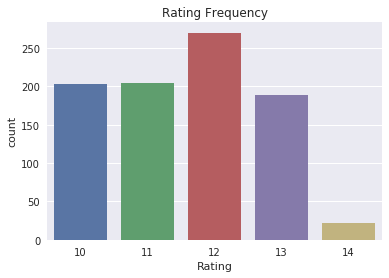

In [72]:
sns.set(style="darkgrid")

ax=sns.countplot(tweet_cons_clean_df.rating_numerator);
plt.title("Rating Frequency")
plt.xlabel('Rating')
fig = ax.get_figure()
fig.savefig('ratingFrq.png')

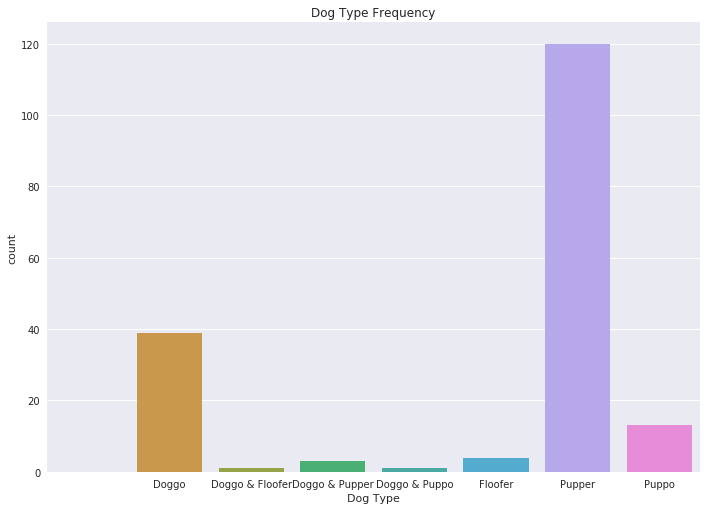

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="dog_type", data=tweet_cons_clean_df[tweet_cons_clean_df.dog_type!='']);
plt.title("Dog Type Frequency")
plt.xlabel('Dog Type')
fig = ax.get_figure()
fig.savefig('dogTypeFrq.png')

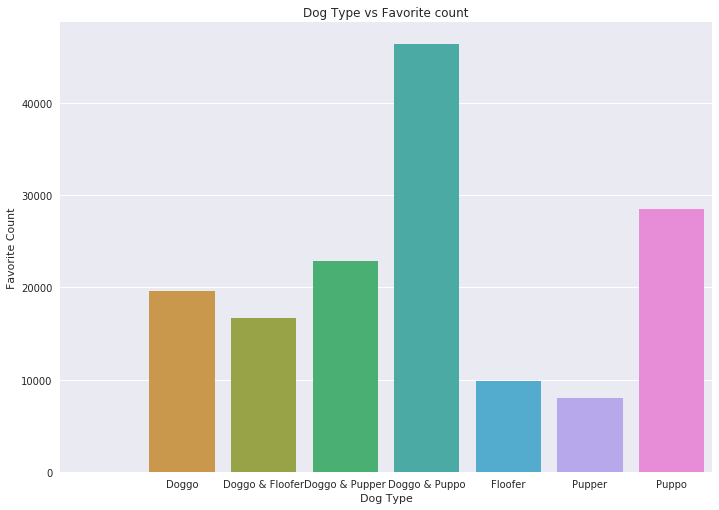

In [74]:
ax = sns.barplot(x='dog_type',y='favorite_count',ci=None, data=tweet_cons_clean_df[tweet_cons_clean_df.dog_type!='']);

plt.title("Dog Type vs Favorite count")
plt.xlabel('Dog Type')
plt.ylabel('Favorite Count')
fig = ax.get_figure()
fig.savefig('dogTypeFavorite.png')

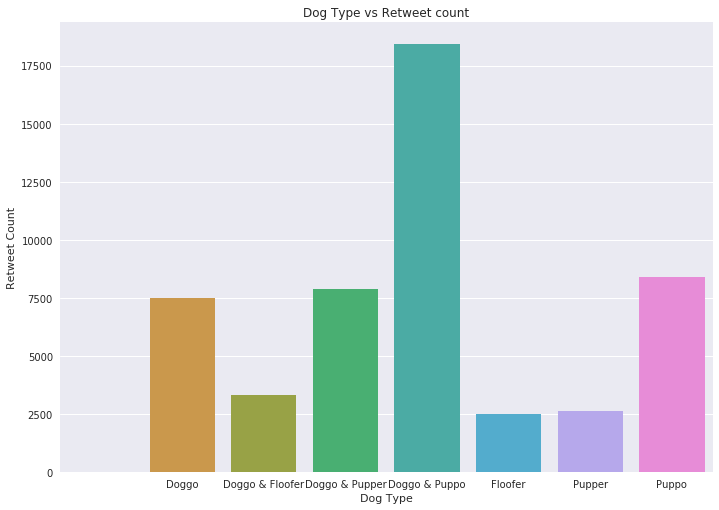

In [75]:
ax = sns.barplot(x='dog_type',y='retweet_count',ci=None, data=tweet_cons_clean_df[tweet_cons_clean_df.dog_type!='']);

plt.title("Dog Type vs Retweet count")
plt.xlabel('Dog Type')
plt.ylabel('Retweet Count')
fig = ax.get_figure()
fig.savefig('dogTypeRetweet.png')

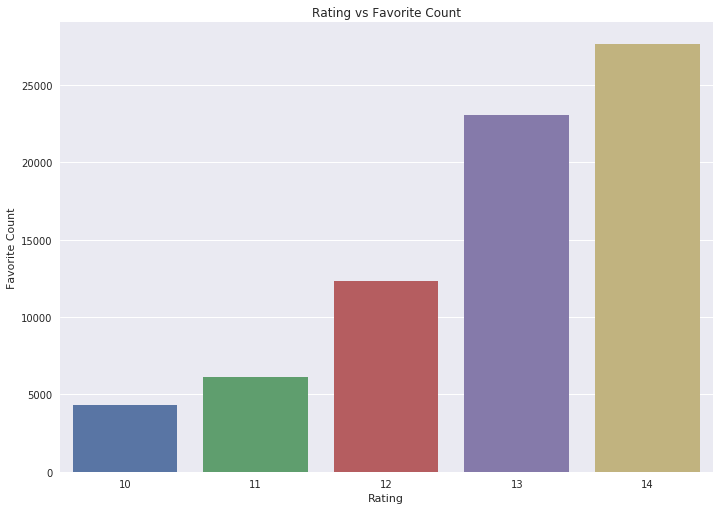

In [76]:
ax = sns.barplot(x='rating_numerator',y='favorite_count',ci=None, data=tweet_cons_clean_df);

plt.title("Rating vs Favorite Count")
plt.xlabel('Rating')
plt.ylabel('Favorite Count')
plt.savefig('ratingFavorite.png')

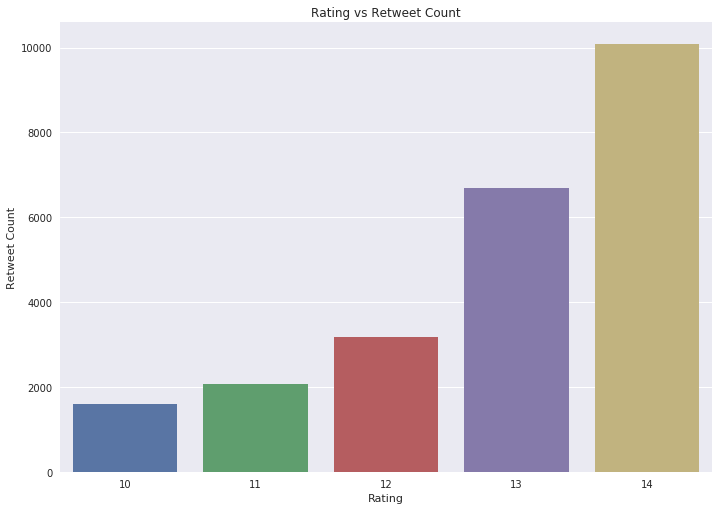

In [77]:
ax = sns.barplot(x='rating_numerator',y='retweet_count',ci=None, data=tweet_cons_clean_df);

plt.title("Rating vs Retweet Count")
plt.xlabel('Rating')
plt.ylabel('Retweet Count')
plt.savefig('ratingRetweet.png')

In [78]:
tweet_cons_clean_df[['favorite_count','retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.00000,0.86548
retweet_count,0.86548,1.00000


In [79]:
tweet_cons_clean_df[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,888.000000,888.000000
mean,11742.854730,3476.022523
std,15194.365676,5369.594354
min,0.000000,80.000000
25%,2677.750000,870.000000
50%,4793.000000,1728.500000
75%,16790.750000,3897.500000
max,141614.000000,62665.000000


#### Insights

From the above data visualization and summarization, we can deduce:
1.	There is strong correlation between retweet_count and favorite_count.
2.	Maximum number of retweets and favorites are made for dogs rated as 13.
3.	A dog can be classified into more than 1 stage e.g. Doggo & Pupper, Doggo & Floofer, Doggo & Puppo
